<div style="text-align: center;">
    <h1>Applied Data Science</h1>
    <h3><em>Spring 2025</em></h3>
    <h2>Assignment 10 - Deep Neural Networks</h2>
    <hr style="width:60%;">
    <h3>AmirReza Azari</h3>
    <p><em>Student ID: 99101087</em></p>
</div>

---

---
## Installing and Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from keras import callbacks
from tensorflow.keras import initializers
from keras.regularizers import l2,l1,l1_l2
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

## Dataset

Working on [fashion mnist](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving fashion-mnist_train.csv to fashion-mnist_train.csv


In [4]:
df_train = pd.read_csv("fashion-mnist_train.csv")

In [7]:
uploaded = files.upload()

Saving fashion-mnist_test.csv to fashion-mnist_test.csv


In [8]:
df_test = pd.read_csv("fashion-mnist_test.csv")

In [9]:
X_train = df_train.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(df_train['label'].values)

X_test = df_test.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_test = to_categorical(df_test['label'].values)

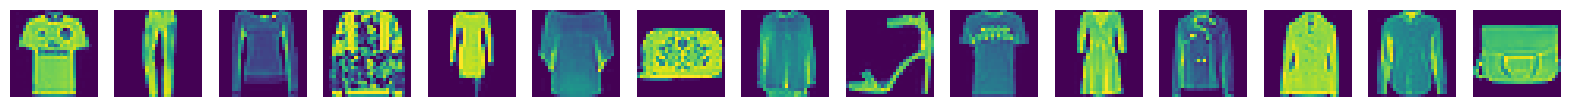

Label [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))

for i in range(15):
    plt.subplot(1, 15, i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
plt.show()

print('Label %s' % (y_test[0:5]))

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [14]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
len(df_train['label'].unique())

10

In [20]:
def create_model(weight_initializer='GlorotUniform',
                 learning_rate=0.001, learning_rate_decay: float=0.95,
                 batch_size=128,
                 dropout_rate: float=0.0,
                 optimizer_name: str='adam',regularization_type: str='kernel',
                 activation_func='relu',
                 l1_reg=0.0,
                 l2_reg=0.0, no_hidden_neurons: list=[10], ):

    if weight_initializer == 'RandomNormal':
        weight_initializer = initializers.RandomNormal()
    elif weight_initializer == 'RandomUniform':
        weight_initializer = initializers.RandomUniform()
    elif weight_initializer == 'GlorotUniform':
        weight_initializer = initializers.GlorotUniform()
    elif weight_initializer == 'GlorotNormal':
        weight_initializer = initializers.GlorotNormal()
    else:
        weight_initializer = None

    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation=activation_func, kernel_initializer=weight_initializer, input_shape=(28, 28, 1))),
    model.add(MaxPooling2D((2, 2))),
    model.add(Conv2D(64, (3, 3), activation=activation_func, kernel_initializer=weight_initializer)),
    model.add(MaxPooling2D((2, 2))),
    model.add(Flatten()),

    itr = 0
    for n_l in no_hidden_neurons:
        if l1_reg and l2_reg:
            if regularization_type == 'activation':
                model.add(Dense(n_l, activation=activation_func,activity_regularizer=l1_l2(l1=l1_reg,l2=l2_reg),kernel_initializer=weight_initializer))
            else:
                model.add(Dense(n_l, activation=activation_func,kernel_regularizer=l1_l2(l1=l1_reg,l2=l2_reg),kernel_initializer=weight_initializer))
        elif l1_reg:
            if regularization_type == 'activation':
                model.add(Dense(n_l, activation=activation_func,activity_regularizer=l1(l1_reg),kernel_initializer=weight_initializer))
            else:
                model.add(Dense(n_l, activation=activation_func,kernel_regularizer=l1(l1_reg),kernel_initializer=weight_initializer))
        elif l2_reg:
            if regularization_type == 'activation':
                model.add(Dense(n_l, activation=activation_func,activity_regularizer=l2(l2_reg),kernel_initializer=weight_initializer))
            else:
                model.add(Dense(n_l, activation=activation_func,kernel_regularizer=l2(l2_reg),kernel_initializer=weight_initializer))
        else:
            model.add(Dense(n_l, activation=activation_func,kernel_initializer=weight_initializer))

        if dropout_rate and itr%2 == 0:
            model.add(Dropout(dropout_rate))

        itr += 1

    model.add(Dense(10, activation='softmax', kernel_initializer=weight_initializer))

    if optimizer_name == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer_name == 'RMSprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer_name == 'Adadelta':
        optimizer = tf.keras.optimizers.Adadelta(learning_rate=learning_rate,rho=learning_rate_decay)
    else:
        optimizer = tf.keras.optimizers.Adam(beta_1=learning_rate_decay)

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [21]:
model = create_model()

In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        16,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,936 (136.47 KB)

 Trainable params: 34,936 (136.47 KB)

 Non-trainable params: 0 (0.00 B)

## Tuning for optimization algorithm

In [24]:
from tensorflow.keras.optimizers import Adam

model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=['accuracy']
)

In [26]:
train_model = model.fit(
                  X_train, y_train,
                  batch_size=128,
                  epochs=20,
                  verbose=1,
              )

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.8395 - loss: 0.4459
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - accuracy: 0.8640 - loss: 0.3807
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 95ms/step - accuracy: 0.8807 - loss: 0.3327
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 91ms/step - accuracy: 0.8872 - loss: 0.3155
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 96ms/step - accuracy: 0.8944 - loss: 0.3004
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.8980 - loss: 0.2891
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 92ms/step - accuracy: 0.9048 - loss: 0.2693
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.9099 - loss: 0.2548
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 95ms/step - accuracy: 0.9106 - loss: 0.2502
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 93ms/step - accuracy: 0.9146 - loss: 0.2381
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.9173 - loss: 0.2303
Epoch 12/20
469/469 ━━━━━━━━━━

In [27]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [29]:
from sklearn.metrics import f1_score
def convert_predictions(predictions):
  output = np.argmax(predictions,axis=1)
  return output

print('Weighted F1-score is %.2f' %f1_score(convert_predictions(y_test), convert_predictions(predictions), average='weighted'))

Weighted F1-score is 0.91


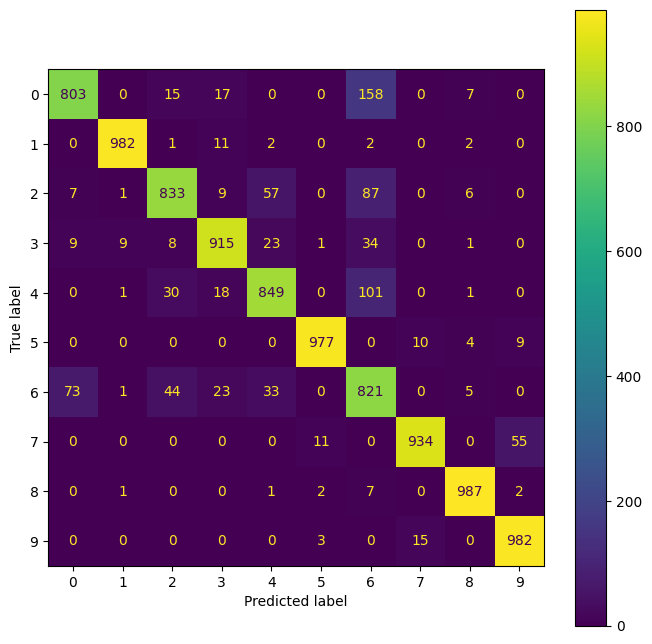

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay.from_predictions(convert_predictions(y_test), convert_predictions(predictions),ax=ax)
plt.show()

In [38]:
from sklearn.model_selection import KFold
def kfold_validation(no_folds: int=3,
                     model_params: dict={},training_params: dict={}):
  validation_set_accuracy = []
  models = []

  verbose=0

  itr = 0
  kf = KFold(n_splits=no_folds)
  for train_index, val_index in kf.split(X_train,y_train):
    train_set, y_train_set = X_train[train_index], y_train[train_index]
    val_set,y_val = X_train[val_index], y_train[val_index]

    model = create_model(**model_params)

    history = model.fit(train_set, y_train_set,
                      validation_data=(val_set,y_val),
                      verbose=verbose,
                      **training_params,
                      )


    pred_val = model.predict(val_set)
    f1 = f1_score(convert_predictions(y_val), convert_predictions(pred_val), average='weighted')

    validation_set_accuracy.append(f1)
    models.append(model)

  validation_set_accuracy = np.array(validation_set_accuracy)

  best_model = models[np.argmax(validation_set_accuracy)]

  return best_model,validation_set_accuracy.mean(),validation_set_accuracy.std()

In [39]:
kfold_params = {
    'no_folds': 4,
    'model_params': {
      'no_hidden_neurons': [25,10],
      'activation_func': 'sigmoid',
      'l1_reg': 0,
      'l2_reg': 0,
      'learning_rate': 0.001,
      'learning_rate_decay': 0.99,
      'dropout_rate':0,
      'weight_initializer': None,
      'optimizer_name': 'adam',
      'regularization_type': 'kernel',
  },
  'training_params': {
    'batch_size': 16,
    'epochs': 25
  }
}

In [ ]:
model, validation_set_accuracy_mean, validation_set_accuracy_std = kfold_validation(**kfold_params)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model = create_model(weight_initializer='GlorotUniform',
                     learning_rate=0.001,
                     batch_size=128,
                     activation_func='relu',
                     l1_reg=0.001,
                     l2_reg=0.001)

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

## Effect of Learning Rate

In [ ]:
def evaluate_efect_param(parameter_type: str='kfold', parameter_name: str='', values_list: list=[]):
  scores_val = []
  scores_test = []
  models = []
  for val in values_list:

      if parameter_type == 'kfold':
        kfold_params[parameter_name] = val
      elif parameter_type == 'model_params':
        kfold_params['model_params'][parameter_name] = val
      elif parameter_type == 'training_params':
        kfold_params['training_params'][parameter_name] = val

      model,validation_set_accuracy_mean,validation_set_accuracy_std = kfold_validation(**kfold_params)

      scores_val.append(validation_set_accuracy_mean)

      predictions = model.predict(X_test)
      score_test = f1_score(convert_predictions(y_test), convert_predictions(predictions), average='weighted')
      scores_test.append(score_test)

      models.append(model)
      print('Val: %s, Validation Score: %.3f, Test Score: %.3f' %(str(val),validation_set_accuracy_mean,score_test))


  # Plot the results
  plt.figure(figsize=(20,8))
  str_values_list = []
  for v in values_list:
    str_values_list.append(str(v))

  plt.plot(str_values_list,scores_test,lw=5)
  plt.plot(str_values_list,scores_val,lw=5,color='orange')
  plt.xlabel(parameter_name)
  plt.ylabel('F1-Score')
  plt.legend(['F1: Test Set','F1: Validation Set'])
  plt.show()

  # Get the best model
  best_model = models[np.argmax(scores_val)]
  best_val = values_list[np.argmax(scores_val)]

  return best_model,best_val


In [ ]:
model, best_lr = evaluate_efect_param(parameter_type='model_params', parameter_name='learning_rate', values_list=[0.0001, 0.001, 0.01, 0.05, 0.1])

In [ ]:
kfold_params['model_params']['learning_rate'] = best_lr
model,best_lr_decay = evaluate_efect_param(parameter_type='model_params',parameter_name='learning_rate_decay', values_list=[0.65, 0.75,0.85,0.95])

## Effect of Batch Size

In [ ]:
kfold_params['model_params']['learning_rate_decay'] = best_lr_decay
model,best_batch_size = evaluate_efect_param(parameter_type='training_params',parameter_name='batch_size', values_list=[4, 32, 128, 256,1024])

In [ ]:
weight_initializers=['RandomNormal','RandomUniform','Zeros','GlorotUniform']
kfold_params['training_params']['batch_size'] = best_batch_size
model,best_weight_initializer = evaluate_efect_param(parameter_type='model_params',parameter_name='weight_initializer', values_list=weight_initializers)
kfold_params['model_params']['weight_initializer'] = best_weight_initializer

## Activation functions

In [ ]:
model,best_activation_func = evaluate_efect_param(parameter_type='model_params',parameter_name='activation_func', values_list=['relu','tanh','sigmoid','selu', 'elu'])
kfold_params['model_params']['activation_func'] = best_activation_func

## L1 and L2 Regularization

In [ ]:
model,best_l1_reg = evaluate_efect_param(parameter_type='model_params',parameter_name='l1_reg', values_list=[0.00001,0.0001,0.001,0.01, 0.1])
kfold_params['model_params']['l1_reg'] = best_l1_reg

In [ ]:
kfold_params['model_params']['regularization_type'] = 'activation'
model,best_l1_reg = evaluate_efect_param(parameter_type='model_params',parameter_name='l1_reg', values_list=[0.00001,0.0001,0.001,0.01])
kfold_params['model_params']['l1_reg'] = best_l1_reg

In [ ]:
model,best_l2_reg = evaluate_efect_param(parameter_type='model_params',parameter_name='l2_reg', values_list=[0.00001,0.0001,0.001,0.01])
kfold_params['model_params']['l2_reg'] = best_l2_reg

## Effect of Dropout, Number of Layers and Network Size, Number of Epochs

In [ ]:
model,best_dropout_rate = evaluate_efect_param(parameter_type='model_params',parameter_name='dropout_rate', values_list=[0.0001,0.01,0.1,0.3])
kfold_params['model_params']['dropout_rate'] = best_dropout_rate

In [ ]:
model,best_architecture = evaluate_efect_param(parameter_type='model_params',parameter_name='no_hidden_neurons',values_list=[[10],[30,10],[20,10,6]])
kfold_params['model_params']['no_hidden_neurons'] = best_architecture

In [ ]:
model,best_no_epochs = evaluate_efect_param(parameter_type='training_params',parameter_name='epochs', values_list=[5,10,30,50])
kfold_params['training_params']['epochs'] = best_no_epochs

In [ ]:
kfold_params['training_params']['epochs'] = 3

## Effect of Optimizer

In [ ]:
model,best_optimizer = evaluate_efect_param(parameter_type='model_params',parameter_name='optimizer_name', values_list=['sgd','adam','RMSprop','Adadelta'])
kfold_params['model_params']['optimizer_name'] = best_optimizer

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
predictions = model.predict(X_test)
print('Weighted F1-score is %.2f' %f1_score(convert_predictions(y_test), convert_predictions(predictions), average='weighted'))
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay.from_predictions(convert_predictions(y_test), convert_predictions(predictions),ax=ax)
plt.show()